In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
%matplotlib inline

In [2]:
def billiards(n=10,plot=True):

    x1 = st.uniform.rvs(0,100) # choose a random initial position for
    y1 = st.uniform.rvs(0,80) # choosing a y value for funsies, doesn't affect score of game
    x= st.uniform.rvs(0,100,n) # Randomly distributing n throws
    y= st.uniform.rvs(0,80,n) # random y for plotting
    
    A = x[x<x1] # array of throws left of initial throws
    B = x[x>x1] # array of throws right of initial throws
    
    if plot: 
        plt.scatter(x1,y1,s=50,c='r',label="Initial Throw")
        
        plt.scatter(A,y[x<x1],s=50,c='b',label="Alice")
        plt.scatter(B,y[x>x1],s=50,c='g',label="Bob")
        plt.legend()
        plt.xticks([])
        plt.yticks([])
        
    return A,B # Returns arrays A and B containing x locations of those throws

Awins = 0
Bwins = 0
for i in range(1000):
    A,B = billiards(11,plot=False)
    if len(A)>len(B):
        Awins += 1
    else:
        Bwins += 1
        
print(Awins,Bwins)

499 501


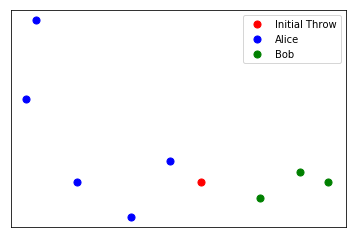

In [5]:
n=0
while n<1:
    plt.cla()
    A,B = billiards(8) # Example situation
    if len(A) == 5:
        break

# Goal

Want to figure out the probability that Bob will win, given that Alice has 5, and Bob has 3.

# Frequentist Approach

Realisitically there's not enough data to draw meaningful conclusions. That said, we can only interpret the data as is. Given the data, we should assume that there's a 5/8ths chance that any throw will favor Alice, and a 3/8ths chance that it will go to Bob.
So:
Bob needs to win 3 times in a row, every throw has an equal chance of 3/8 (based on what's happened so far). 

${(3/8)*(3/8)*(3/8) = 27/512 = 5.3\%}$ chance 


# But what if...

But suppose we have **prior** knowledge that the initial throw is exactly in the center.
The chance of Bob winning becomes 

$ 1/2*1/2*1/2 = 1/8 = 12.5\% $

The probability, or **likelihood**, that the data would look like it does (Alice has 5 and Bob has 3) given this placement (exactly in the middle) is:

$ P(Alice)^5 * P(Bob)^3 $

$ 1/2^5*1/2^3 = 0.391\%$

Compared to the likelihood of the frequentist assumption given the data:

$ \frac{5}{8}^5*\frac{3}{8}^3 = 0.503\%$

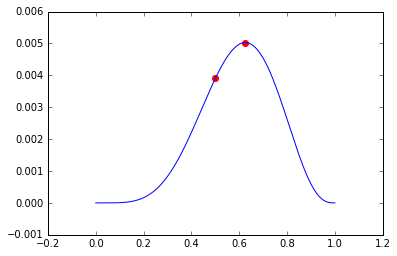

In [19]:
x = np.linspace(0,1,200)
y = x**5*(1-x)**3
plt.plot(x,y)
plt.scatter(5./8.,(5./8.)**5*(3./8.)**3,c='red',s=50,linewidths=0)
plt.scatter(1./2.,(1./2.)**8,c='red',s=50,linewidths=0)

As expected the maximal likelihood agrees with the frequentist interpretation. Notably, however, a random selection of the starting point would favor a closer to center initial throw. The Bayesian approach marginalizes this oversight by evaluating the likelihood of all possible initial throws.

# The Bayesian Approach

The probability of Bob winning is, as we've seen, dependent on the initial throw, but we don't know what the initial throw is. We need to figure out the probability that the data would be what it is given all possible initial throws. We need to integrate over all possible values.

We can't know exactly where the initial throw landed, but what we do know **prior** to the throw is the probability that it lands in any given place, i.e. we know the probability distribution function (PDF). In this case, the PDF is uniform, it's equally likely to be anywhere between 0 and 100% across the table.

We also need to account for the **likelihood** of any given initial throw based on the data we have, how well does the model fit the data.

$P(B|D) = \int P(B|p,D)P(p|D) dp $

Which should be read this way: The probability that Bob will win given the data is equal to the integral over all initial throws of the probability that Bob will win given an initial throw, multiplied by the likelihood of that initial throw given the data.

## The probability that Bob will win given the initial placement and the data P(B|p,D)

This is fairly trivial since we know that any random throw will result in a random place and thus the probability is simply 1-p, where p is the probability that it lands on Alice's side. In order for Bob to win this must happen 3 times, $(1-p)^3$

## The probability of the initial placement given the data

According to Bayes:

$ P(p|D) = \frac{P(D|p)P(p)}{P(D)} $

The probability of a placement given the data is the likelihood of the data given the placement multiplied by the probability of the placement, normalized by the probability of the data.

Where the likelihood of the data given an initial throw, is the product of probabilities that would lead to the data. In this situation it's $P(A)^5*P(B)^3$, or defining p as probability Alice will win a given throw, P(A) is simply p, and P(B) is 1-p so the total probability of the given situation is $p^5*(1-p)^3$.

$ P(B|D) = \int \frac{P(B|p,D)P(D|p)P(p)}{P(D)}$

In practice, the denominator is the normalization factor and can be calculated later. The challenge is to calculate the numerator.

P(p) is the **prior**, the distribution of the probability of the initial throw. We make a guess as to what this looks like. In this case, we believe any point has an equal probability so we have a uniform prior.

P(D|p) is the likelihood. It takes into account the probability of getting the data given the initial throw and the probability that Bob will win, dependent on the initial throw.

P(D) is the probability of the data, which is a seperate integral over all initial throws of the probability of the data given the initial throw, multiplied by the probability of the initial throw itself, $P(D) = \int{P(D|p)P(p)}dp$

$ P(B|D) =  \frac{\int P(B|p,D)P(D|p)P(p)dp}{\int P(D|p)P(p)dp}$

Given that the placement must be somewhere on the table, the integral ranges from 0 (left hand side) to 1 (right hand side)

$ P(B|D) =  \frac{\int_0^1 P(B|p,D)P(D|p)dp}{\int_0^1 P(D|p)dp}$

$ P(B|D) =  \frac{\int_0^1 (1-p)^3p^5(1-p)^3 dp}{\int_0^1 (1-p)^3p^5dp}=\frac{\int_0^1 (1-p)^6p^5 dp}{\int_0^1 (1-p)^3p^5dp}$


In [62]:
P_A = xi/100    # Pxi is the initial throw, it is the probability that any random throw 
                # will land to the left of it. This is the prior, that is, the probability that a 
                # given xi is chosen.
def prior(param):
    # returns random initial throw based on uniform distribution between p[0] and p[1]
    lo = param[0]
    hi = param[1]
    return st.uniform(lo,hi)

def likelihood(pr):
    # likelihood of bob winning based on initial throw
    return (1-pr)**3

def normalization(pr):
    
Pdb = P_A**3   # The probability that Bob gets 3 straight points based on the initial throw position
                
Pd = P_A**3*(1-P_A)**5 # The probability of the actual data given the initial throw


NameError: name 'xi' is not defined